Nama : Tarissa fitriani

Nim : 09011381823116

Kelas : SK5 Bukit

Klasifikasi Social Network Ads (SVM)

# Support Vector Machine

# Mengimpor Pustaka
Seperti biasa, langkah pertama akan selalu mencakup mengimpor perpustakaan yang merupakan NumPy, Pandas dan Matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset
Pada langkah ini, kita akan mendapatkan dataset dari repositari github saya yang disimpan sebagai SocialNetworkAds.csv dan menyimpannya ke dataset variabel . Kemudian kita akan menetapkan variabel terkait ke X dan Y. Akhirnya, kita akan melihat 5 baris pertama dari dataset kita .

In [2]:
dataset = pd.read_csv('SocialNetworkAds.csv')
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Memisahkan set data menjadi set Pelatihan dan set Pengujian
Ada 400 baris dalam dataset ini. Kami akan membagi data menjadi set pelatihan dan pengujian. Dalam hal ini test_size=0.25 menunjukkan bahwa 25% dari data akan disimpan sebagai set Tes dan 75 % sisanya akan digunakan untuk pelatihan sebagai set Pelatihan . Jadi, ada sekitar 100 titik data dalam set pengujian.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Penskalaan Fitur
Langkah penskalaan fitur ini merupakan langkah tambahan yang dapat meningkatkan kecepatan program saat kami menurunkan nilai X ke kisaran yang lebih kecil. Dalam hal ini, kami menurunkan X_train dan X_test ke kisaran kecil -1 hingga +1. Misalnya, gaji 75000 diperkecil menjadi 0,16418997.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Melatih model Klasifikasi SVM di Set Pelatihan
Setelah tes pelatihan siap, kita dapat mengimpor Kelas Klasifikasi SVM dan menyesuaikan set pelatihan ke model kita. Kelas SVC ditetapkan ke pengklasifikasi variabel. Kernel yang digunakan disini adalah kernel “rbf” yang merupakan singkatan dari Radial Basis Function. Ada beberapa kernel lain seperti kernel linear dan Gaussian yang juga dapat diimplementasikan. Fungsi classifier.fit () kemudian digunakan untuk melatih model.

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

# Memprediksi hasil set Tes
Dalam langkah ini, fungsi classifier.predict () digunakan untuk memprediksi nilai set Test dan nilai disimpan ke variabel y_pred.

In [6]:
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Confusion Matrix and Accuracy
Ini adalah langkah yang banyak digunakan dalam teknik klasifikasi. Dalam hal ini, kita melihat Akurasi model yang dilatih dan memetakan matriks konfusi.
Matriks konfusi adalah tabel yang digunakan untuk menunjukkan jumlah prediksi yang benar dan yang salah pada masalah klasifikasi ketika nilai sebenarnya dari Test Set diketahui. Ini adalah formatnya
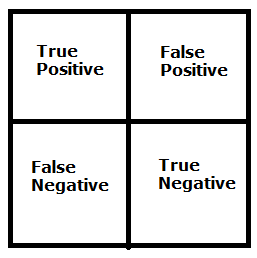
Nilai True adalah jumlah prediksi benar yang dibuat.

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.94


array([[60,  1],
       [ 5, 34]], dtype=int64)

Dari confusion matriks di atas, kami menyimpulkan bahwa, dari 100 data set pengujian, 94 diklasifikasikan dengan benar dan 6 diklasifikasikan salah, sehingga akurasi 94%.

# Memvisualisasikan Hasil
Pada langkah terakhir ini, kami memvisualisasikan hasil model Klasifikasi SVM pada grafik yang diplot bersama dengan dua wilayah.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


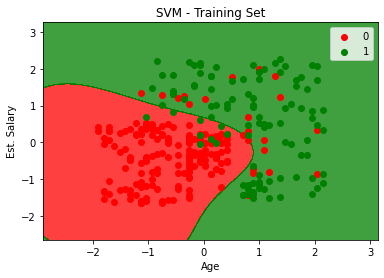

In [8]:
#Visualizing the Training Set results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,
                              step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,
                              step = 0.01))
plt.contourf(X1,X2,classifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
    cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title("SVM - Training Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


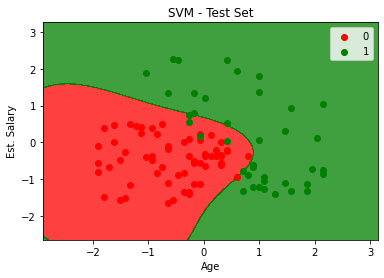

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,
                              step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,
                              step = 0.01))
plt.contourf(X1,X2,classifier.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
    cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title("SVM - Test Set")
plt.xlabel("Age")
plt.ylabel("Est. Salary")
plt.legend()
plt.show()

Di plot ini, Ada dua wilayah. Wilayah Merah menunjukkan 0, yang terdiri atas orang yang belum membeli produk dan wilayah Hijau menunjukkan 1, yang terdiri dari orang-orang yang telah membeli produk. Karena kita telah memilih kernel non-linier (rbf), kita mendapatkan daerah yang tidak dipisahkan oleh garis linier.
Jika Anda perhatikan dengan seksama, kita dapat melihat 5 titik data yang salah diklasifikasikan di set pengujian dengan perbedaan warna di wilayah tertentu.

sumber : 
https://towardsdatascience.com/machine-learning-basics-support-vector-machine-svm-classification-205ecd28a09d
https://github.com/mesushan/Support-Vector-Machine-Social-Network-Ads/blob/master/kernel_svm.py